In [20]:
from pyod.models.lof import LOF
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
pulsar = pd.read_csv('Documents/Pulsar-Detection/HTRU2/mini_pulsar.csv')

In [22]:
pulsar

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
5,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
6,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
7,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
8,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
9,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0


In [23]:
df = pulsar.drop('class_labels',1)
df.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920


In [24]:
clf = LocalOutlierFactor(n_neighbors=5,contamination=0.2)

In [25]:
clf.fit(pulsar)

LocalOutlierFactor(algorithm='auto', contamination=0.2, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=5, novelty=False, p=2)

[-0.89876629 -1.16523215 -0.9592589  -1.03103872 -2.47998051 -1.15985034
 -1.23101287 -2.91449326 -1.15985034 -1.05012219 -1.15985034 -0.93408446
 -1.02172317 -1.15985034 -1.08788106 -2.47998051 -1.04433879 -1.01219467
 -1.00147618 -1.15985034 -0.92617279 -1.03498909 -1.33565251]


(array([ 1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  7., 12.]),
 array([-2.91449326, -2.71292056, -2.51134786, -2.30977517, -2.10820247,
        -1.90662977, -1.70505708, -1.50348438, -1.30191168, -1.10033898,
        -0.89876629]),
 <a list of 10 Patch objects>)

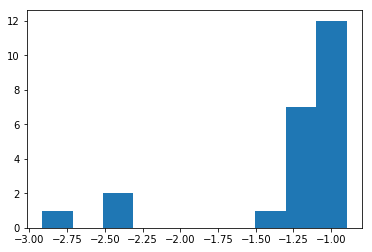

In [15]:
print(clf.negative_outlier_factor_)
plt.hist(clf.negative_outlier_factor_)

In [17]:
df = pd.read_csv('Documents/Pulsar-Detection/HTRU2/mini_pulsar.csv')

In [18]:
df['score'] = clf.negative_outlier_factor_

In [19]:
df

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels,score
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,-0.898766
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,-1.165232
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,-0.959259
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,-1.031039
4,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1,-2.479981
5,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,-1.159850
6,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0,-1.231013
7,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0,-2.914493
8,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0,-1.159850
9,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0,-1.050122
